### Algorithms

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
mydata=pd.read_csv('auto-mpg.csv')   # Loading the file

In [16]:
mydata.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl
165,20.0,8,262.0,110,3221,13.5,75,1,chevrolet monza 2+2
347,37.0,4,85.0,65,1975,19.4,81,3,datsun 210 mpg
286,17.6,8,302.0,129,3725,13.4,79,1,ford ltd landau
133,16.0,6,250.0,100,3781,17.0,74,1,chevrolet chevelle malibu classic
383,38.0,4,91.0,67,1965,15.0,82,3,honda civic
39,14.0,8,400.0,175,4464,11.5,71,1,pontiac catalina brougham
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340
105,13.0,8,360.0,170,4654,13.0,73,1,plymouth custom suburb
260,18.6,6,225.0,110,3620,18.7,78,1,dodge aspen


In [17]:
mydata.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [18]:
mydata.shape

(398, 9)

In [19]:
mydata.drop('car name', axis=1,inplace=True)

In [20]:
mydata['origin']=mydata['origin'].replace({1:'America',2:'Europe',3:'Asia'})
mydata.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
6,14.0,8,454.0,220,4354,9.0,70,America
220,33.5,4,85.0,70,1945,16.8,77,Asia
112,19.0,4,122.0,85,2310,18.5,73,America
303,31.8,4,85.0,65,2020,19.2,79,Asia
186,27.0,4,101.0,83,2202,15.3,76,Europe
289,16.9,8,350.0,155,4360,14.9,79,America
241,22.0,6,146.0,97,2815,14.5,77,Asia
162,15.0,6,258.0,110,3730,19.0,75,America
160,17.0,6,231.0,110,3907,21.0,75,America
121,15.0,8,318.0,150,3399,11.0,73,America


In [21]:
#one hot encoding
#one hot encoding
mydata=pd.get_dummies(mydata,columns=['origin'])
mydata.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Asia,origin_Europe
9,15.0,8,390.0,190,3850,8.5,70,1,0,0
158,16.0,8,318.0,150,4498,14.5,75,1,0,0
253,20.5,6,200.0,95,3155,18.2,78,1,0,0
112,19.0,4,122.0,85,2310,18.5,73,1,0,0
332,29.8,4,89.0,62,1845,15.3,80,0,0,1
98,16.0,6,250.0,100,3278,18.0,73,1,0,0
195,29.0,4,85.0,52,2035,22.2,76,1,0,0
366,17.6,6,225.0,85,3465,16.6,81,1,0,0
323,27.9,4,156.0,105,2800,14.4,80,1,0,0
339,26.6,4,151.0,84,2635,16.4,81,1,0,0


### Dealing with Missing value

In [22]:
mydata.describe()

,mpg,cyl,disp,wt,acc,yr,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [23]:
mydata.describe(include='all')

,mpg,cyl,disp,hp,wt,acc,yr,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [24]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    object 
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   origin_America  398 non-null    uint8  
 8   origin_Asia     398 non-null    uint8  
 9   origin_Europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [25]:
median2=mydata['hp'].median()    #replacing missing values of agent
median2

TypeError: could not convert string to float: '?'

In [26]:
mydata['hp']=mydata['hp'].replace('?',np.nan)   # replacing ? from hp column
mydata['hp']=mydata['hp'].astype(float)

In [27]:
median2=mydata['hp'].median()    #replacing missing values of agent
median2

93.5

In [28]:
mydata['hp'].replace(np.nan,median2,inplace=True)

In [29]:
mydata.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                float64
wt                  int64
acc               float64
yr                  int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

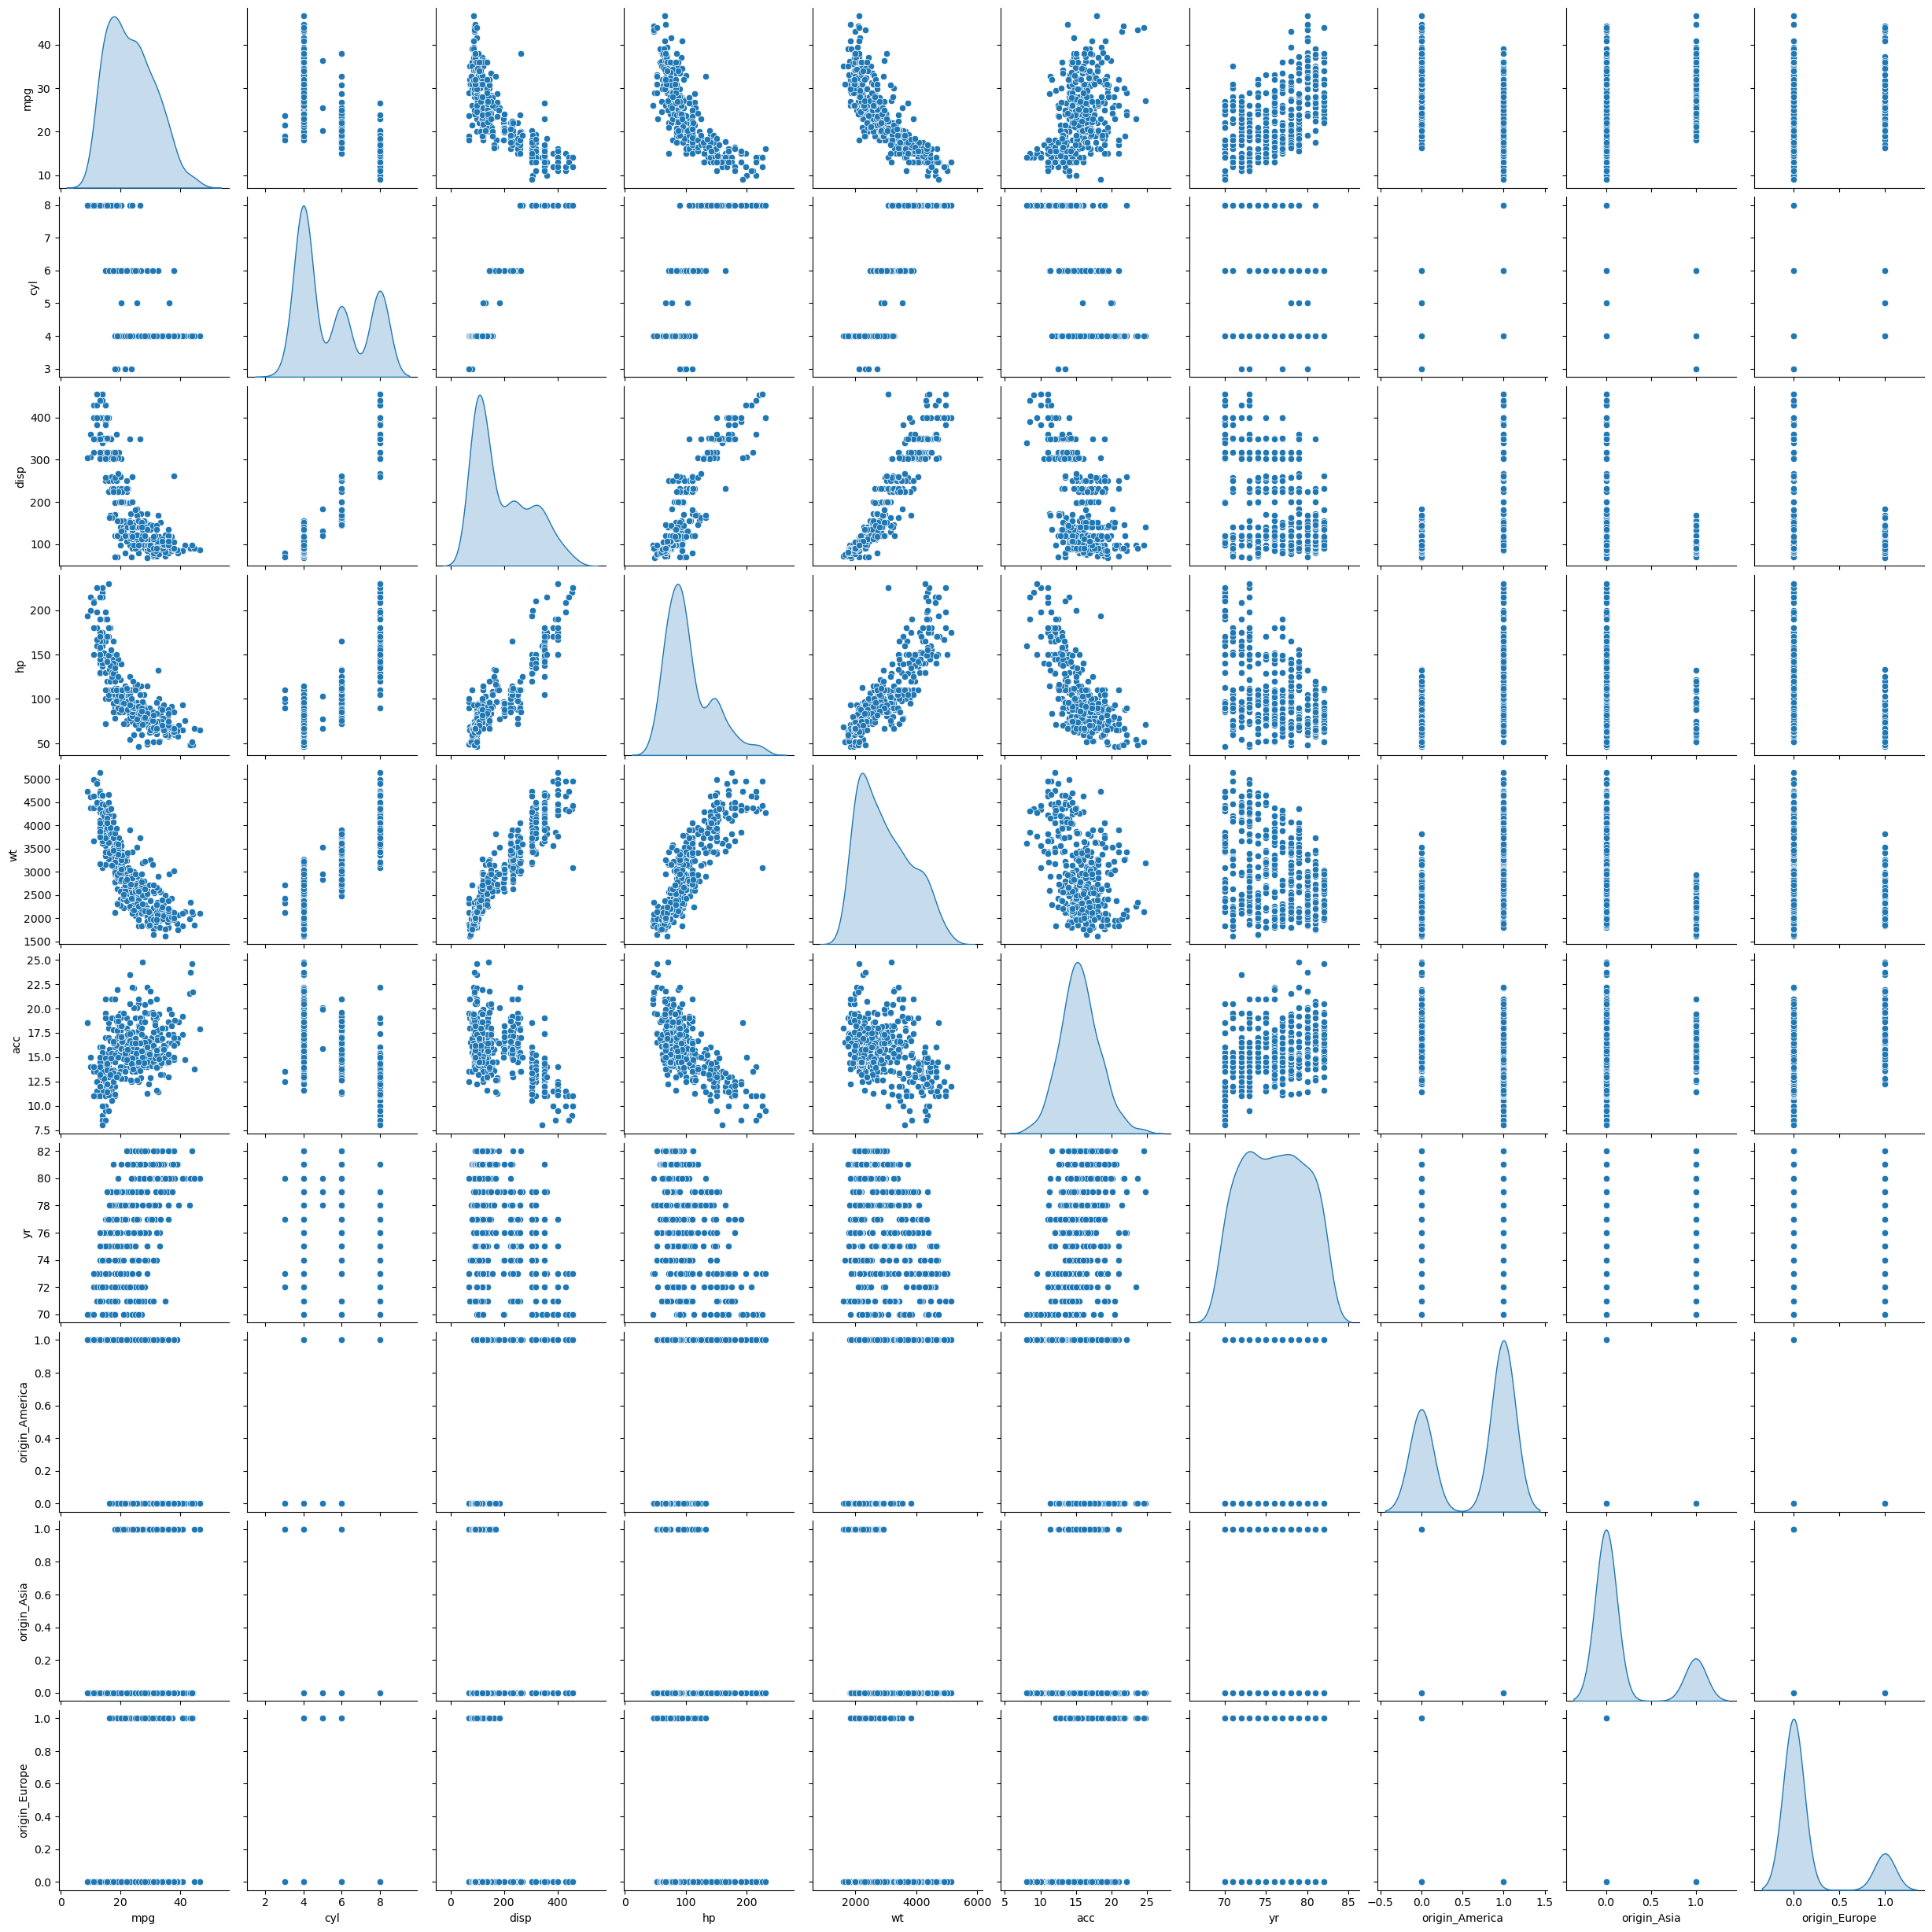

In [30]:
sns.pairplot(mydata,diag_kind='kde')

In [31]:
# Buildin Linear model
# Independent Varibal
X=mydata.drop(['mpg'],axis=1)

#dependent Variable
Y=mydata[['mpg']]

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

### Fit Linear Model

In [33]:
model_1=LinearRegression()
model_1.fit(X_train,Y_train)

LinearRegression()

In [34]:
model_1.score(X_train,Y_train)          #model training data score

0.8141025501610559

In [35]:
model_1.score(X_test,Y_test)              #model test data score

0.8433135132808829

In [36]:
from sklearn.tree import DecisionTreeRegressor    #controlling overfitting

In [46]:
model_2=DecisionTreeRegressor(max_depth=3,criterion='friedman_mse')

In [47]:
model_2.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [48]:
model_2.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [49]:
model_2.score(X_test,Y_test)

0.7892652919447365

In [50]:
model_2.score(X_train,Y_train)

0.8252713272277856